## HOUSING PRICES PREDICTION USING REGRESSION


In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
#from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
#from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import seaborn
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


### DATA IMPORT:
Read the train data in 'train'. Similarly read the test data in 'test'. Then, we combine train and test using the "Concat" function. 
Test does not have a 'SalePrice' column so it is being dropped from the entire dataset.

In [54]:
train = pd.read_csv('train.csv')
labels=train["SalePrice"]
test = pd.read_csv('test.csv')
data = pd.concat([train,test], ignore_index=True)
data = data.drop("SalePrice", 1)
ids = test["Id"]

In [55]:
# head() function displays the number of columns from the train data and based on the number 
# passed to this function it will display that many number of rows
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [56]:
# shape outputs the number of rows and columns in the dataframe
train.shape

(1460, 81)

In [57]:
data.shape

(2919, 80)

In [58]:
# info method provides information about dataset like 
# total values in each column, null/not null, datatype, memory occupied etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [59]:
# describe() is like summary, that gives total count of values, mean of each column,
# standard deviation, minimum, maximum etc
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,5.564577,6.089072,2.251799,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.113131,1.409947,35.663946,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,5.000000,5.000000,0.000000,0.000000,5.000000,NaN,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,5.000000,6.000000,0.000000,0.000000,6.000000,NaN,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,6.000000,7.000000,0.000000,0.000000,7.000000,NaN,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,9.000000,10.000000,800.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [60]:
# Correlation with respect to SalePrice
# train.corr()["Sales Price"] is used to deduce the strength of co-relation between every feature and SalePrice 
# and then we sort them in descending order.
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis = 0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [61]:
# Count the number of NaNs each column has.
# isnull() detects the number of missing value and .sum() will add the total number of missing values
nans = pd.isnull(data).sum()
nans[nans>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [62]:
# Remove id and columns with more than 1400 missing values
data=data.drop("Id", 1)
data=data.drop("Alley", 1)
data=data.drop("Fence", 1)
data=data.drop("MiscFeature", 1)
data=data.drop("PoolQC", 1)
data=data.drop("FireplaceQu", 1)

### DATA MANIPULATION
    using Imputer and log transformation

In [63]:
# Categorical and non-categorical variables
all_columns = data.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

categorical = [value for value in all_columns if value not in non_categorical]

In [64]:
# get_dummies takes the categorical features and converts them into dummy/indicator field of 0 or 1
data = pd.get_dummies(data)

# Imputer function imputes the missing value ='NaN' with the most frequently occuring value in the column
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# fit_transform() function will fit the above imputer on the exiting data and transform it by replacing all the NaN 
data = imp.fit_transform(data)

# Log transformation
# Since the data points are distributed, we take log of all the data points to bring them closer
# without affecting the variance. 
data = np.log(data)
labels = np.log(labels)

# For all the points that are 0, log(0) will be -inf so the next line assigns 
# zero to all the values that are -inf because of the log transformation.
data[data==-np.inf]=0


### FEATURE REDUCTION
using Principal Component Analysis(PCA)

Principal component analysis is a feature reduction process wherein we can reduce the dimensions 
of the datasets using the principal components that will best display the variance. It is a procedure to identify small number of uncorrelated variables called "principal components" from a large dataset. 

In [65]:
# The goal of whitening is to make the input less redundant and improves the predictive accuracy
pca = PCA(whiten=True)
pca.fit(data)

# The goal of principal components analysis is to explain the maximum amount of variance 
# with the fewest number of principal components.
# So now, we calculate the variance of each feature and then take cummulative sum of these variance.
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([ 0.2248857 ,  0.40281429,  0.52425789,  0.62418823,  0.69580422,
        0.75944463,  0.8116806 ,  0.85647038,  0.89178708,  0.92273755,
        0.94898868,  0.95842727,  0.96637545,  0.97380464,  0.97971901,
        0.98501952,  0.98918839,  0.99199181,  0.99386559,  0.99520919,
        0.99611479,  0.99695667,  0.99771023,  0.99842564,  0.9989402 ,
        0.99933882,  0.99959949,  0.99978254,  0.99988174,  0.99993998,
        0.99998599,  0.99999658,  0.99999871,  0.99999943,  0.99999999,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [66]:
# Depending upon the value of variance received in previous step, we choose components and 
# then pass the number of component to the PCA estimator for feature reduction based on 
# this number and we again fit and tranform this on the dataPCA

pca = PCA(n_components = 35, whiten = True)
pca = pca.fit(data)

# Applying dimensionality reduction(reduce noise)
dataPCA = pca.transform(data)

In [67]:
# Split training and test
train = data[:1460]
test = data[1460:]

### MODEL SELECTION

lets_try function is written to check the performance of three regression models choosen and check which performs the best based on R square measure. 
We are considering Hubber, Linear and Random Forest. test_model function uses cross validation and measures the r-square value using make_scorer function. Cross validation score is then calculated using the measure(rsquare) using K-fold method for all the classifier. For all the iterations depending upon the n_splits get the cross validation score and then return the mean of cross validation score.

,R Square Score
Linear,0.853790
RandomForest,0.839710
Hubber,0.836665


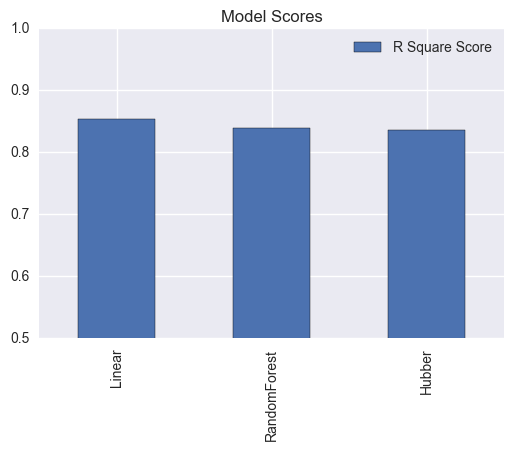

In [68]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(train,labels)

,R Square Score
Hubber,0.859543
Linear,0.853516
RandomForest,0.713461


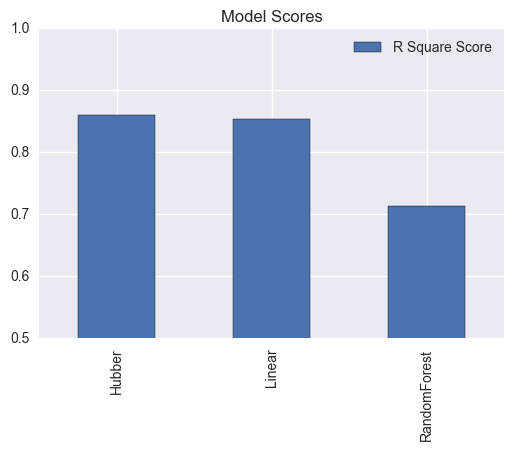

In [69]:
train = dataPCA[:1460]
test = dataPCA[1460:]

lets_try(train,labels)

### HUBER REGRESSOR

Huber Regressor is a type of Linear Regression model.
It is different because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It differs from other models because 
it does not ignore the effect of the outliers but gives a lesser weight to them.

PARAMETERS:

epsilon: Controls the number of samples that should be classified as outliers The smaller the epsilon, the more robust it is to outliers.

alpha: Regularization parameter.

tol: The iteration will stop when the max value of the i-th index of projected gradient is reached



In [70]:
cv = KFold(n_splits=5,shuffle=True,random_state=45)

parameters = {'alpha': [1000,100,10],
              'epsilon' : [1.2,1.25,1.50],
              'tol' : [1e-10]}

clf = linear_model.HuberRegressor()
r2 = make_scorer(r2_score)
# GridSearchCV method is used for Exhaustive search over specified parameter values for an estimator
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(train, labels)
best_clf = grid_fit.best_estimator_ 

best_clf.fit(train,labels)

HuberRegressor(alpha=100, epsilon=1.25, fit_intercept=True, max_iter=100,
        tol=1e-10, warm_start=False)

In [71]:
# Make predictions

predictions_huber = best_clf.predict(test)

predictions_huber = np.exp(predictions_huber)


sub = pd.DataFrame({
        "Id": ids,
        "SalePrice": predictions_huber
    })

sub.to_csv("prices_submission1.csv", index=False)

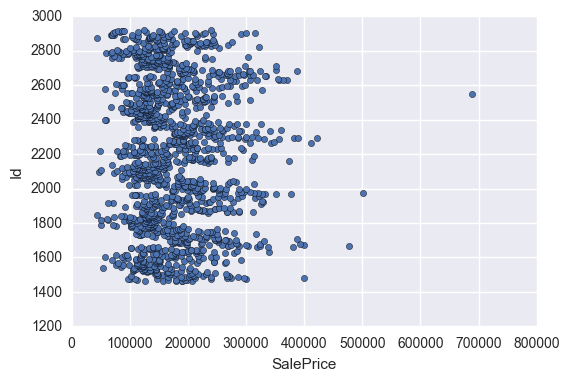

In [72]:
sub.plot(x = "SalePrice", y = "Id", kind = "scatter")